<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

df['TMED'] = np.where(df['Price'] >= 15000, 1, 0).astype(int)
df.TMED = df.TMED.astype('float64')
df['CW_new'] = pd.qcut(df['Carat Weight'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'])
df['Cut'] = df['Cut'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Clarity'] = df['Clarity'].astype('category')
df['Polish'] = df['Polish'].astype('category')
df['Symmetry'] = df['Symmetry'].astype('category')
df['Report'] = df['Report'].astype('category')

y = df['TMED'] # выбираем целевую переменную
X = df.drop('TMED', axis=1) # переменные для проверки влияния
df = df.drop('Carat Weight', axis=1)
X = X.drop('Price', axis=1)
df.drop('Price', axis=1).info()
X = X.drop('Carat Weight', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Cut       6000 non-null   category
 1   Color     6000 non-null   category
 2   Clarity   6000 non-null   category
 3   Polish    6000 non-null   category
 4   Symmetry  6000 non-null   category
 5   Report    6000 non-null   category
 6   TMED      6000 non-null   float64 
 7   CW_new    6000 non-null   category
dtypes: category(7), float64(1)
memory usage: 89.5 KB


In [43]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [44]:
y.value_counts()

,count
TMED,
0.0,4494
1.0,1506


In [45]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.utils import resample

data = pd.concat([X, y], axis=1)

majority = data[data['TMED'] == 0]
minority = data[data['TMED'] == 1]

majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Объединяем обратно
data_balanced = pd.concat([majority_downsampled, minority])

# Новые X и y
X_balanced = data_balanced.drop('TMED', axis=1)
y_balanced = data_balanced['TMED']

In [47]:
print(y_balanced.value_counts())

TMED
0.0    1506
1.0    1506
Name: count, dtype: int64


In [48]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [49]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy: 0.9402654867256637

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       459
         1.0       0.93      0.95      0.94       445

    accuracy                           0.94       904
   macro avg       0.94      0.94      0.94       904
weighted avg       0.94      0.94      0.94       904



In [50]:
unique, counts = np.unique(y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts))

{0.0: 453, 1.0: 451}

In [81]:
numeric_features = X_balanced.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
#X_balanced[numeric_features] = scaler.fit_transform(X_balanced[numeric_features])

In [82]:
# Разделяем данные
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)

In [54]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy: 0.9402654867256637

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       459
         1.0       0.93      0.95      0.94       445

    accuracy                           0.94       904
   macro avg       0.94      0.94      0.94       904
weighted avg       0.94      0.94      0.94       904



In [55]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, y_train_bal)

# Предсказания
y_pred_bal = model_balanced.predict(X_test_bal)


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Вычисляем матрицу ошибок (TP, FP, TN, FN)
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
tn, fp, fn, tp = conf_matrix.ravel()

# Рассчитываем метрики
accuracy = accuracy_score(y_test_bal, y_pred_bal)
precision = precision_score(y_test_bal, y_pred_bal)
recall = recall_score(y_test_bal, y_pred_bal)
f1 = f1_score(y_test_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_bal, y_pred_bal)

# Генерируем classification_report
class_report = classification_report(y_test_bal, y_pred_bal, output_dict=True)

# Формируем результаты для наглядного вывода
results = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}

# Округляем все значения в словаре до двух знаков после запятой и возвращаем в виде dict.items()
rounded_items = {k: round(v, 2) for k, v in results.items()}

In [57]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       459
         1.0       0.93      0.95      0.94       445

    accuracy                           0.94       904
   macro avg       0.94      0.94      0.94       904
weighted avg       0.94      0.94      0.94       904



txt

In [58]:
conf_matrix
# TN FP
# FN TP

array([[429,  30],
       [ 24, 421]])

In [59]:
rounded_items

{'True Negatives (TN)': 429,
 'False Positives (FP)': 30,
 'False Negatives (FN)': 24,
 'True Positives (TP)': 421,
 'Accuracy': 0.94,
 'Precision': 0.93,
 'Recall': 0.95,
 'F1-score': 0.94,
 'ROC-AUC': 0.94}

In [ ]:
#y = df['Price']

#X = df.drop(['Price', 'TMED'], axis=1)

In [60]:
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [61]:
X

,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_IF,...,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,CW_new_Q2,CW_new_Q3,CW_new_Q4,CW_new_Q5,CW_new_Q6
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,True,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
5996,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,True,True,False,False,False,False
5997,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
5998,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Разделяем данные
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=42)

# Определяем категориальные и числовые признаки
categorical_features = X_train_multi.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train_multi.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

# Создаем Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))
])

# Обучаем модель
pipeline.fit(X_train_multi, y_train_multi)

# Предсказания
y_pred_multi = pipeline.predict(X_test_multi)

# Извлекаем модель дерева решений из pipeline
tree_model = pipeline.named_steps['classifier']

# Получаем имена признаков после обработки
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(categorical_features + numerical_features)


In [84]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(y_test_multi, y_pred_multi))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1348
         1.0       0.88      0.86      0.87       452

    accuracy                           0.94      1800
   macro avg       0.92      0.91      0.91      1800
weighted avg       0.93      0.94      0.93      1800



In [85]:
accuracy_score(y_test_multi, y_pred_multi)

0.935

In [86]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test_multi, y_pred_multi)

0.90954478611381

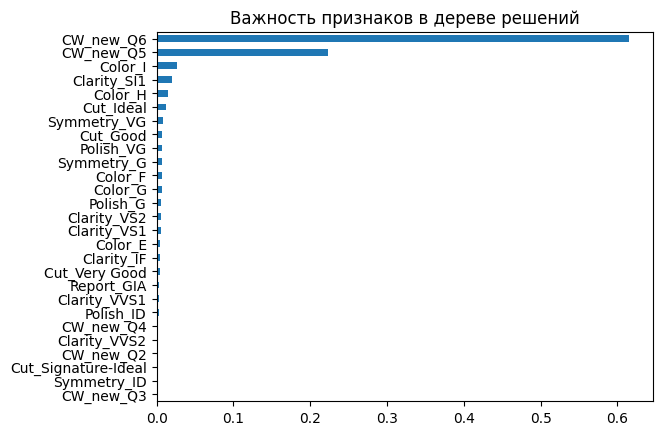

In [87]:
import matplotlib.pyplot as plt
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()

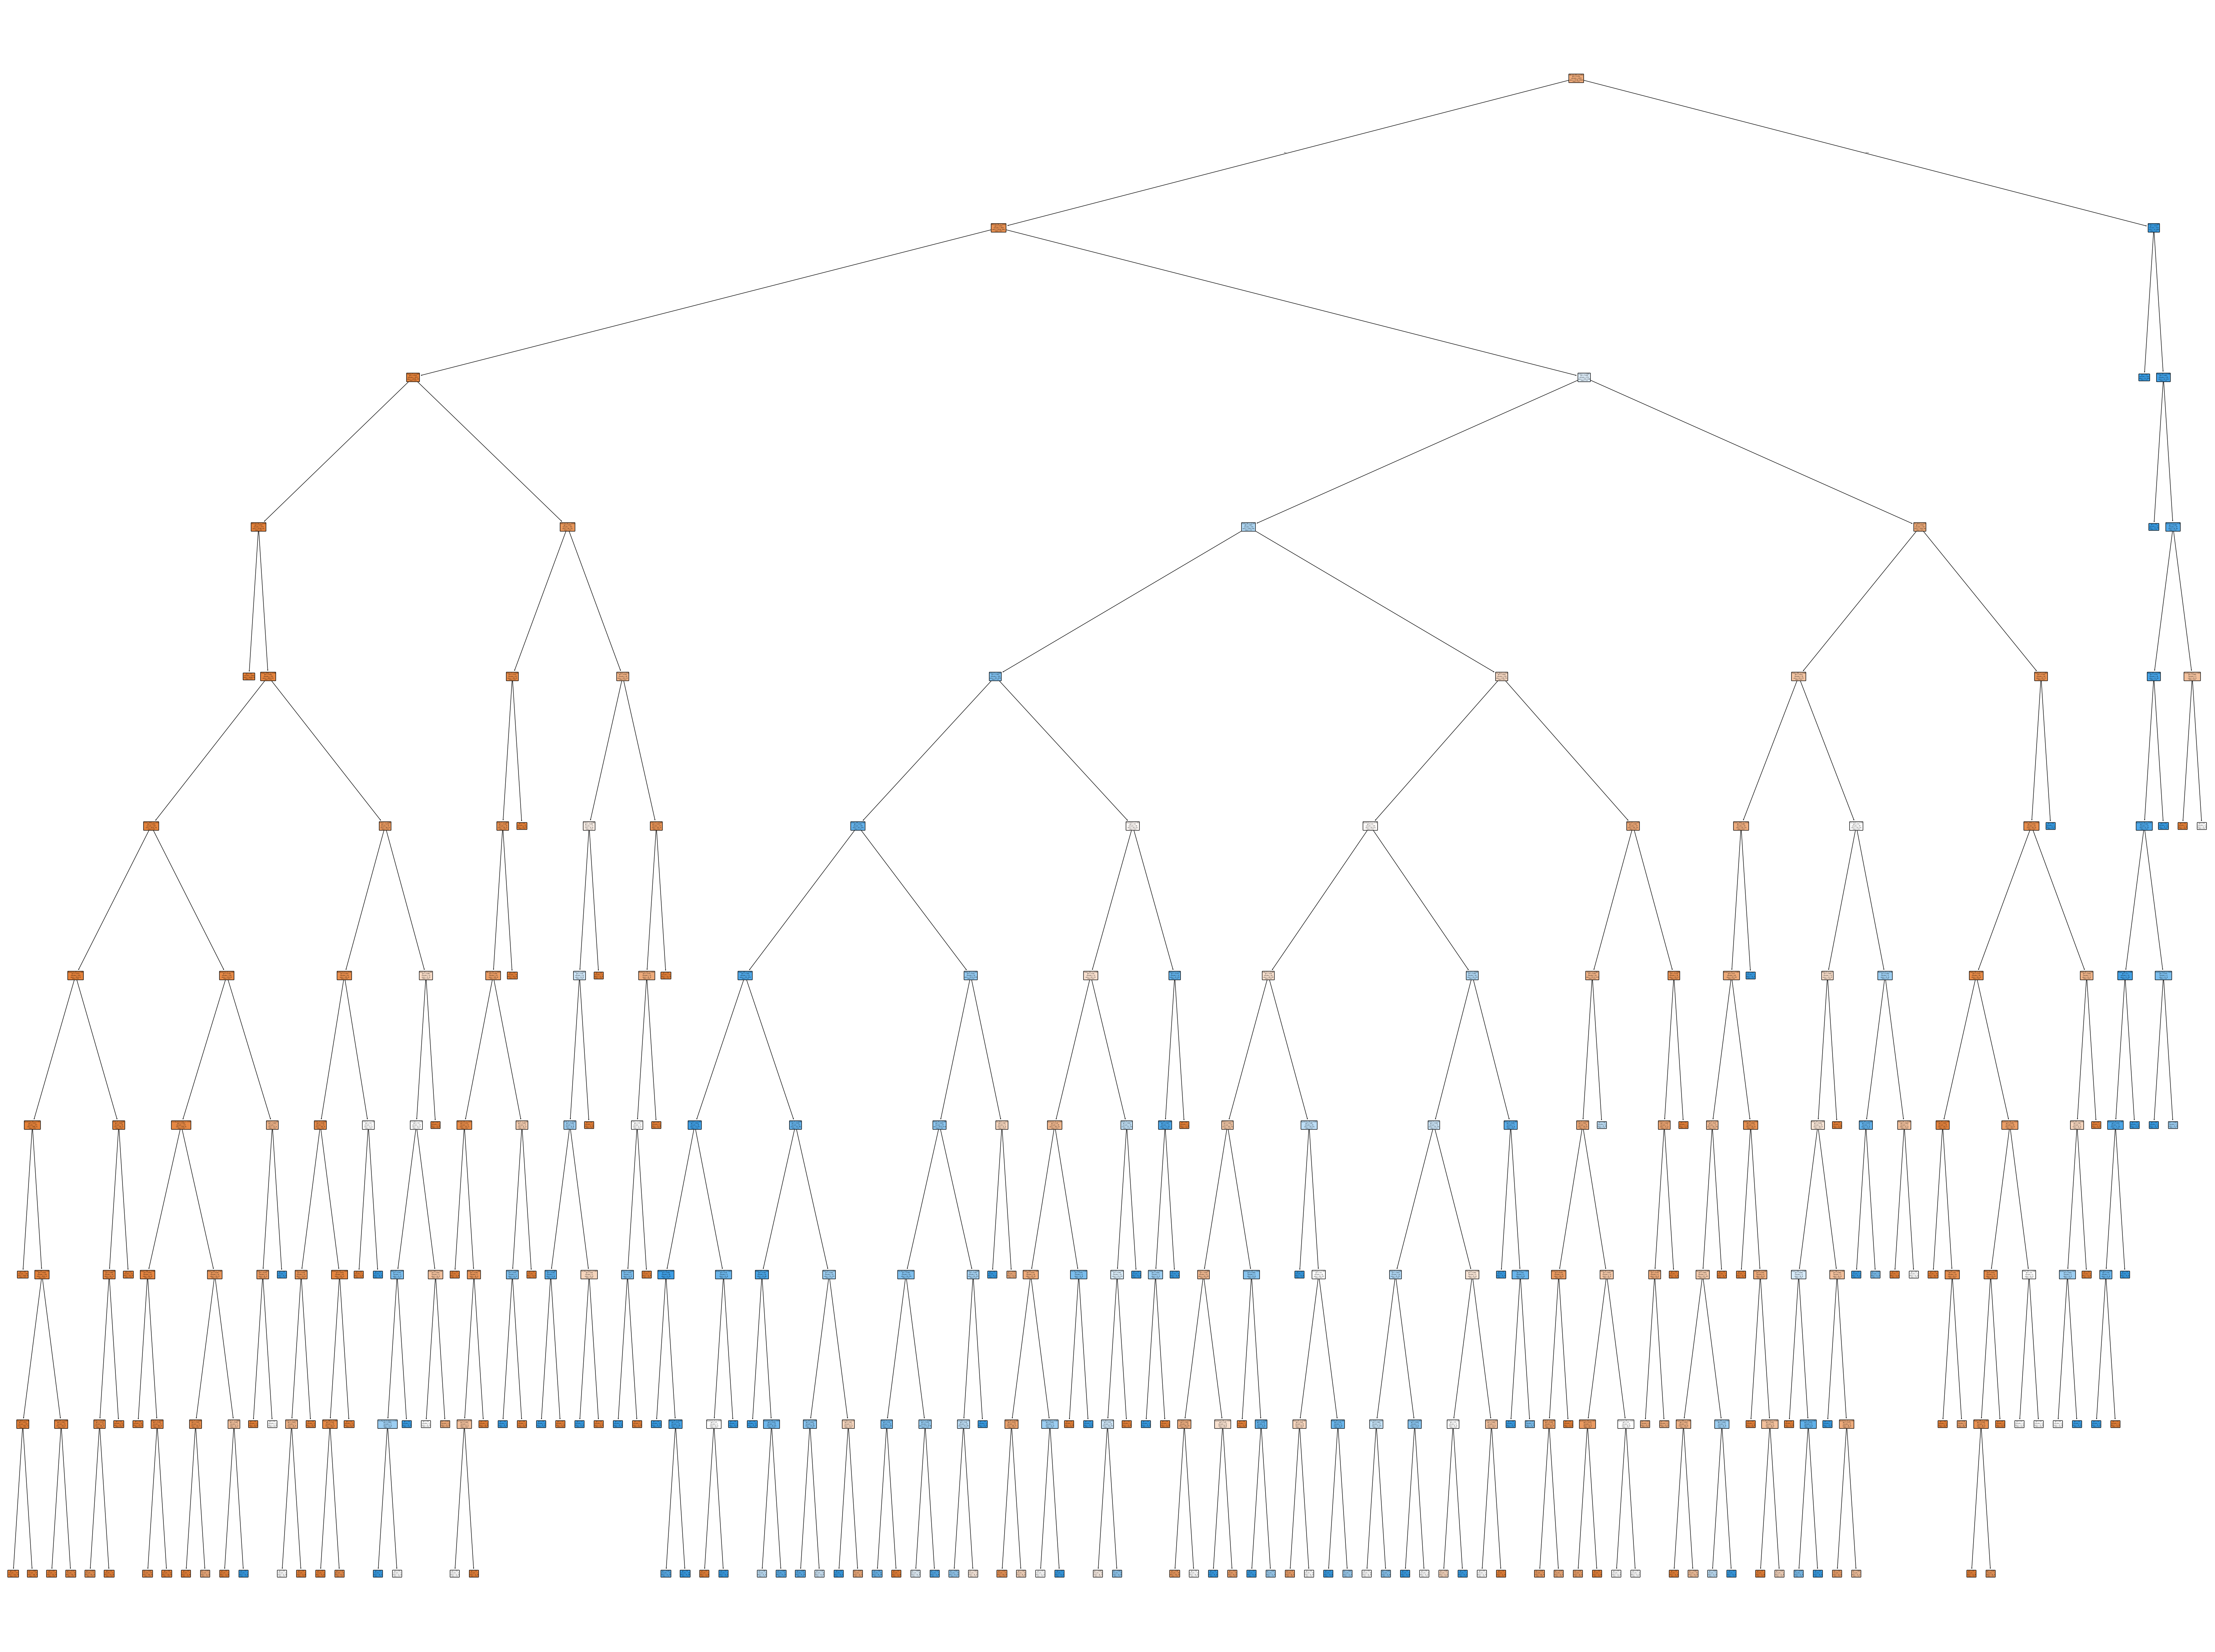

In [88]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(item) for item in sorted(y.unique())], filled=True, rounded=True)
plt.show()